# Understanding recurrent neural networks

This notebook contains the code samples found in Chapter 6, Section 2 of [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python?a_aid=keras&a_bid=76564dff). Note that the original text features far more content, in particular further explanations and figures: in this notebook, you will only find source code and related comments.

---

[...]

## A first recurrent layer in Keras

The process we just naively implemented in Numpy corresponds to an actual Keras layer: the `SimpleRNN` layer:


In [2]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import Dense

In [3]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [4]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(64, return_sequences=True))  # return_sequences=True is needed when stacking LSTM and GRU
model.add(GRU(32))
model.add(Dense(1, activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 lstm (LSTM)                 (None, None, 64)          24832     
                                                                 
 gru (GRU)                   (None, 32)                9408      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 354273 (1.35 MB)
Trainable params: 354273 (1.35 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(64, return_sequences=True))  # return_sequences=True is needed when stacking LSTM and GRU
model.add(GRU(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 183s 1s/step - loss: 0.6183 - acc: 0.6376 - val_loss: 0.4487 - val_acc: 0.7902
Epoch 2/10
157/157 [==============================] - 186s 1s/step - loss: 0.3762 - acc: 0.8390 - val_loss: 0.3148 - val_acc: 0.8760
Epoch 3/10
157/157 [==============================] - 178s 1s/step - loss: 0.2807 - acc: 0.8896 - val_loss: 0.3258 - val_acc: 0.8640
Epoch 4/10
157/157 [==============================] - 163s 1s/step - loss: 0.2411 - acc: 0.9060 - val_loss: 0.2924 - val_acc: 0.8884
Epoch 5/10
157/157 [==============================] - 144s 918ms/step - loss: 0.2079 - acc: 0.9215 - val_loss: 0.3429 - val_acc: 0.8514
Epoch 6/10
157/157 [==============================] - 130s 831ms/step - loss: 0.1907 - acc: 0.9302 - val_loss: 0.4052 - val_acc: 0.8490
Epoch 7/10
157/157 [==============================] - 134s 852ms/step - loss: 0.1728 - acc: 0.9366 - val_loss: 0.3951 - val_acc: 0.8772
Epoch 8/10
157/157 [==============================] - 141s 8

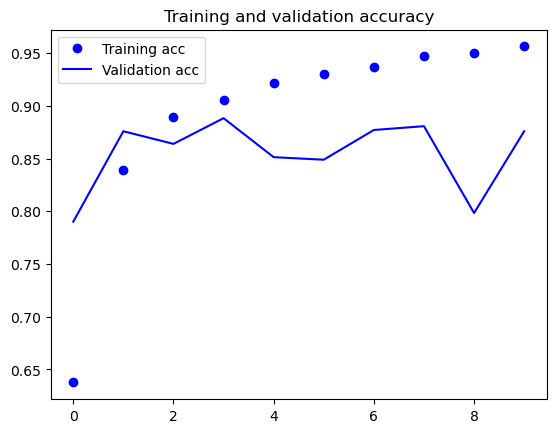

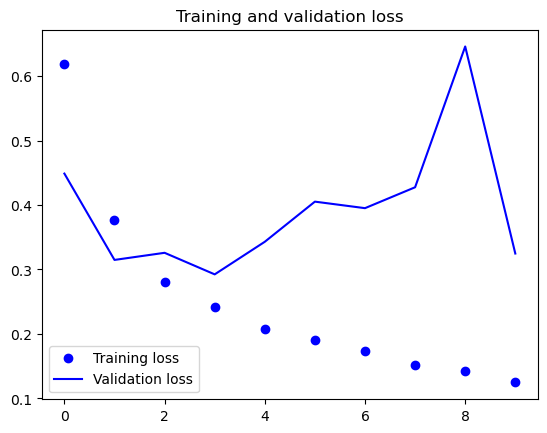

In [5]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [6]:
from sklearn.metrics import confusion_matrix

# Predict classes using the test set
y_pred = (model.predict(input_test) > 0.5).astype('int32')

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract true positives, true negatives, false positives, and false negatives
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

# Calculate accuracy, sensitivity (recall), and specificity
accuracy = (TP + TN) / (TP + TN + FP + FN)
sensitivity = TP / (TP + FN)  # Recall
specificity = TN / (TN + FP)

print(f'Accuracy: {accuracy:.4f}')
print(f'Sensitivity (Recall): {sensitivity:.4f}')
print(f'Specificity: {specificity:.4f}')

782/782 [==============================] - 58s 73ms/step
Accuracy: 0.8647
Sensitivity (Recall): 0.8554
Specificity: 0.8739


In [7]:
# Print the confusion matrix
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[10924  1576]
 [ 1807 10693]]
